In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from datetime import datetime
import plotly.express as px 
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, 
    accuracy_score, 
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    roc_auc_score
)
from sklearn.cluster import KMeans
import plotly.express as px
import tabulate
from imblearn.under_sampling import RandomUnderSampler
import re


In [2]:
sns.set(style='whitegrid', palette='muted')

customers_export = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/customers_export.csv')

order_over_time = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/orders_over_time_2023-10-18.csv')

returning_customers = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/returning_customers.csv')

sales_over_time = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/Sales over time_2023-10-18.csv')

sales = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/sales_2023-10-18_2024-10-16.csv')

sales_by_product = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/sales_by_product_2023-10-18.csv')

sales_by_traffic = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/sales_by_traffic_referrer_2023_.csv')

klaviyo_data = pd.read_excel(r'/home/juandi/Documents/TOM_JETSON/Data/cleaned_data_for_klaviyo.xlsx')

product_1 = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/products_export_1.csv')

product_2 = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/products_export_1.csv')

product_3 = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/products_export_3.csv')

orders_1 = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/orders_export_1.csv')

orders_2 = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/orders_export_2.csv')

orders_3 = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/Data/orders_export_3.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/home/juandi/Documents/TOM_JETSON/Data/customers_export.csv'

In [5]:
products_total = pd.concat([product_1,product_2,product_3], ignore_index=True)

order_total = pd.concat([orders_1,orders_2,orders_3], ignore_index=True)

In [6]:
order_total['Created at'] = order_total['Created at'].astype(str).str.strip()

# Intentar convertir 'Created at' a datetime y manejar errores
order_total['Created at'] = pd.to_datetime(order_total['Created at'], errors='coerce', utc=True)

# Revisar cuántas fechas fueron convertidas correctamente
print(f"Fechas válidas: {order_total['Created at'].notna().sum()}")
print(f"Fechas no válidas: {order_total['Created at'].isna().sum()}")

# Imprimir algunas fechas no válidas para inspección
fechas_no_validas = order_total[order_total['Created at'].isna()]
print(fechas_no_validas.head(10))  # Ver las primeras filas con fechas no válidas

# Filtrar solo las filas con fechas válidas
df = order_total.dropna(subset=['Created at'])

# Filtrar los registros para el mes de diciembre
df_december = df[df['Created at'].dt.month == 11]

# Lista de colores extendida
color_list = [
    "black", "white", "red", "blue", "green", "yellow", "pink", "purple", "grey", "gray",
    "navy", "gold", "brown", "burgundy", "cream", "fuchsia", "sky", "taupe", "olive", "dark",
    "light", "silver", "teal", "beige", "coral", "mustard", "lavender", "orange", "magenta",
    "aqua", "ivory", "maroon", "charcoal", "mint", "peach", "plum", "sand", "bronze"
]

# Crear un patrón de regex para encontrar colores
color_pattern = r'\b(?:' + '|'.join(color_list) + r')\b'

# Función para extraer colores de la columna 'Lineitem name'
def extract_colors(text):
    colors = re.findall(color_pattern, text, re.IGNORECASE)
    return [color.lower() for color in colors]

# Aplicar la función para extraer colores
df_december['Colores Extraidos'] = df_december['Lineitem name'].apply(lambda x: extract_colors(str(x)))

# Separar los colores en filas individuales
df_exploded = df_december.explode('Colores Extraidos')

# Eliminar filas sin colores extraídos
df_exploded = df_exploded.dropna(subset=['Colores Extraidos'])

# Seleccionar las columnas necesarias
df_resultado = df_exploded[['Lineitem name', 'Colores Extraidos', 'Created at']]

# Guardar el resultado en un archivo CSV
df_resultado.to_csv('colores_extraidos_noviembre.csv', index=False)

print("Archivo 'colores_extraidos_noviembre.csv' generado exitosamente.")

Fechas válidas: 57176
Fechas no válidas: 0
Empty DataFrame
Columns: [Name, Email, Financial Status, Paid at, Fulfillment Status, Fulfilled at, Accepts Marketing, Currency, Subtotal, Shipping, Taxes, Total, Discount Code, Discount Amount, Shipping Method, Created at, Lineitem quantity, Lineitem name, Lineitem price, Lineitem compare at price, Lineitem sku, Lineitem requires shipping, Lineitem taxable, Lineitem fulfillment status, Billing Name, Billing Street, Billing Address1, Billing Address2, Billing Company, Billing City, Billing Zip, Billing Province, Billing Country, Billing Phone, Shipping Name, Shipping Street, Shipping Address1, Shipping Address2, Shipping Company, Shipping City, Shipping Zip, Shipping Province, Shipping Country, Shipping Phone, Notes, Note Attributes, Cancelled at, Payment Method, Payment Reference, Refunded Amount, Vendor, Outstanding Balance, Employee, Location, Device ID, Id, Tags, Risk Level, Source, Lineitem discount, Tax 1 Name, Tax 1 Value, Tax 2 Name, T

/tmp/ipykernel_12674/1820311664.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_december['Colores Extraidos'] = df_december['Lineitem name'].apply(lambda x: extract_colors(str(x)))


Total de ventas recientes: 316
Número de filas comunes entre entrenamiento y prueba: 0
Distribución de Target: [25718   280]
Distribución en y_train: [16459   179]
Distribución en y_val: [4115   45]
Distribución en y_test: [5144   56]
Distribución después del undersampling: [179 179]
Mejores parámetros: {'C': 0.001, 'max_iter': 500}
Reporte de validación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4115
           1       1.00      1.00      1.00        45

    accuracy                           1.00      4160
   macro avg       1.00      1.00      1.00      4160
weighted avg       1.00      1.00      1.00      4160

AUC-ROC en validación: 1.0000
Reporte de prueba:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5144
           1       1.00      1.00      1.00        56

    accuracy                           1.00      5200
   macro avg       1.00      1.00      1.00   

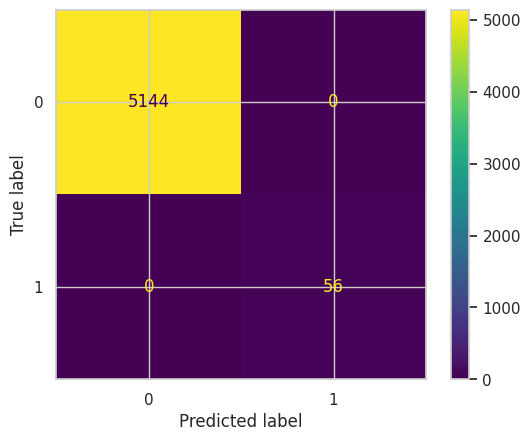

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
import plotly.express as px
from sklearn.cluster import KMeans
import tabulate

# Asegurar que 'Created at' sea datetime
order_total['Created at'] = pd.to_datetime(order_total['Created at'], errors='coerce')

# Filtrar ventas recientes de noviembre y diciembre de 2024
recent_sales = order_total[
    (order_total['Created at'].dt.month.isin([10, 11, 12])) &
    (order_total['Created at'].dt.year == 2024)
].copy()

print(f"Total de ventas recientes: {len(recent_sales)}")

# Calcular ventas recientes y totales por producto
recent_product_sales = recent_sales.groupby('Lineitem name').size().reset_index(name='Recent Order Count')
historical_sales = order_total.groupby('Lineitem name').size().reset_index(name='Historical Order Count')

# Combinar las ventas recientes y totales
combined_sales = pd.merge(recent_product_sales, historical_sales, on='Lineitem name', how='outer').fillna(0)

# Calcular ventas ponderadas
combined_sales['Weighted_Order_Count'] = (
    0.8 * combined_sales['Recent Order Count'] + 
    0.2 * combined_sales['Historical Order Count']
)

# Crear la columna 'Target' como un indicador binario
combined_sales['Target'] = (combined_sales['Recent Order Count'] > 0).astype(int)

# Dividir los datos en entrenamiento y prueba según la presencia de ventas recientes
train_data = combined_sales[combined_sales['Recent Order Count'] == 0]
test_data = combined_sales[combined_sales['Recent Order Count'] > 0]
common_rows = pd.merge(train_data, test_data, on=['Lineitem name'], how='inner')
print(f'Número de filas comunes entre entrenamiento y prueba: {len(common_rows)}')

# Escalar las características
scaler = StandardScaler()
X = scaler.fit_transform(combined_sales[['Recent Order Count', 'Historical Order Count']])
y = combined_sales['Target']

# Verificar la distribución de las clases en 'Target'
print("Distribución de Target:", np.bincount(y))

# Verificar si hay más de una clase
if len(np.unique(y)) <= 1:
    print("Error: El conjunto de datos tiene solo una clase.")
    print(f"Clases encontradas: {np.unique(y)}")
else:
    # Dividir los datos en entrenamiento y prueba
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    # Dividir los datos de entrenamiento en entrenamiento y validación
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42
    )

    print("Distribución en y_train:", np.bincount(y_train))
    print("Distribución en y_val:", np.bincount(y_val))
    print("Distribución en y_test:", np.bincount(y_test))

    # Aplicar undersampling para balancear las clases
    undersampler = RandomUnderSampler(random_state=42)
    X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

    print("Distribución después del undersampling:", np.bincount(y_train_resampled))

    # Definir el modelo y la búsqueda de hiperparámetros
    param_grid = {'C': [0.001, 0.01, 0.1], 'max_iter': [500]}
    strat_kfold = StratifiedKFold(n_splits=5)

    log_reg = LogisticRegression(class_weight='balanced')
    grid_search = GridSearchCV(log_reg, param_grid, cv=strat_kfold, scoring='roc_auc', error_score='raise')
    grid_search.fit(X_train_resampled, y_train_resampled)

    best_model = grid_search.best_estimator_
    print(f"Mejores parámetros: {grid_search.best_params_}")

    # Evaluación en validación
    y_val_pred = best_model.predict(X_val)
    y_val_prob = best_model.predict_proba(X_val)[:, 1]
    print("Reporte de validación:\n", classification_report(y_val, y_val_pred))
    print(f"AUC-ROC en validación: {roc_auc_score(y_val, y_val_prob):.4f}")

    # Evaluación en prueba
    y_test_pred = best_model.predict(X_test)
    y_test_prob = best_model.predict_proba(X_test)[:, 1]
    print("Reporte de prueba:\n", classification_report(y_test, y_test_pred))
    print(f"AUC-ROC en prueba: {roc_auc_score(y_test, y_test_prob):.4f}")

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

    # Calcular las probabilidades de predicción
    combined_sales['Prediction_Probability'] = best_model.predict_proba(X)[:, 1]

    # Mostrar los 15 productos más probables para noviembre y diciembre 2024
    threshold = 0.6
    top_predictions = combined_sales[combined_sales['Prediction_Probability'] > threshold]
    top_predictions = top_predictions.sort_values(by='Prediction_Probability', ascending=False).head(15)

    print("Top 15 productos más probables para noviembre y diciembre 2024:")
    formatted_table = tabulate.tabulate(
        top_predictions[['Lineitem name', 'Prediction_Probability']],
        headers=['Producto', 'Probabilidad de Venta'],
        tablefmt='fancy_grid'
    )
    print(formatted_table)

    # Agrupar ventas recientes por cliente
    customer_data = recent_sales.groupby('Email').agg(
        Total_Spent=('Total', 'sum'),
        Order_Count=('Id', 'count')
    ).reset_index()

    # Aplicar logaritmo a Total_Spent
    customer_data['Log_Total_Spent'] = np.log1p(customer_data['Total_Spent'])
    customer_data_scaled = scaler.fit_transform(customer_data[['Log_Total_Spent', 'Order_Count']])

    # Aplicar KMeans para clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

    # Visualizar clustering con Plotly
    fig = px.scatter(
        customer_data, 
        x='Log_Total_Spent', 
        y='Order_Count', 
        color='Cluster', 
        title='Clustering de Clientes (Log del Total Gastado)',
        labels={'Log_Total_Spent': 'Log(1 + Total Gastado)', 'Order_Count': 'Número de Órdenes'},
        hover_data=['Email'],
        size='Order_Count',
        size_max=12,
        template='plotly_dark'
    )

    fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))
    fig.update_yaxes(range=[0, customer_data['Order_Count'].max() + 2])
    fig.show()


## Segmentacion Cliente

In [25]:
def generate_top5_chart(df, month):
    
    df_month = df[df['Created at'].dt.month_name() == month]
    
    top5_colors = df_month['Extracted_Colors'].value_counts().nlargest(5).index
    
    df_month_top5 = df_month[df_month['Extracted_Colors'].isin(top5_colors)]
    
    weekly_frequency = df_month_top5.groupby(['Day_Of_Week', 'Extracted_Colors']).size().reset_index(name='Frequency')
    
    fig = go.Figure()
    
    for color in top5_colors:
        color_data = weekly_frequency[weekly_frequency['Extracted_Colors'] == color]
        
        if color.lower() == 'white':
            fig.add_trace(
                go.Scatter(
                    x=color_data['Day_Of_Week'],
                    y=color_data['Frequency'],
                    mode='lines+markers',
                    name=color,
                    line=dict(color='white', width=3),  # Línea más gruesa
                    marker=dict(size=10, line=dict(color='black', width=2))  # Marcadores con borde negro
                )
            )
        else:
            fig.add_trace(
                go.Scatter(
                    x=color_data['Day_Of_Week'],
                    y=color_data['Frequency'],
                    mode='lines+markers',
                    name=color,
                    line=dict(color=color.lower()),
                    marker=dict(size=8)
                )
            )
        
    fig.update_layout(
        plot_bgcolor='rgba(50, 50, 50, 0.8)',  # Fondo más oscuro
        paper_bgcolor='white',  # Fondo del papel más oscuro
        title=f'Top 5 Colors - {month} 2023',
        xaxis_title='Day of the Week',
        yaxis_title='Frequency',
        legend_title='Colors',
        xaxis=dict(
            categoryorder='array', 
            categoryarray=ordered_days,
            gridcolor='rgba(255, 255, 255, 0.2)',  # Líneas de la cuadrícula en blanco transparente
            color='black'  # Color del texto del eje
        ),
        yaxis=dict(
            gridcolor='rgba(255, 255, 255, 0.2)',  # Líneas de la cuadrícula en blanco transparente
            color='black'  # Color del texto del eje
        ),
        font=dict(color='black'),  # Texto en negro
        legend=dict(
            font=dict(color='black'),  # Texto de la leyenda en negro
            bgcolor='rgba(0,0,0,0)'  # Fondo transparente de la leyenda
        )
    )

    fig.show()

generate_top5_chart(df_exploded, 'November')

/tmp/ipykernel_12674/2336521173.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [26]:
df = pd.read_csv(r'/home/juandi/Documents/TOM_JETSON/colores_extraidos_diciembre.csv')


df['Created at'] = pd.to_datetime(df['Created at'], errors='coerce')

df = df[(df['Created at'].dt.month.isin([12])) & (df['Created at'].dt.year == 2023)]

df_exploded = df.assign(Extracted_Colors=df['Colores Extraidos'].str.split(',')).explode('Extracted_Colors')

df_exploded['Extracted_Colors'] = df_exploded['Extracted_Colors'].str.strip()

df_exploded = df_exploded[df_exploded['Extracted_Colors'].str.lower() != 'sin color']

df_exploded['Day_Of_Week'] = df_exploded['Created at'].dt.day_name()

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_exploded['Day_Of_Week'] = pd.Categorical(df_exploded['Day_Of_Week'], categories=ordered_days, ordered=True)

def generate_top5_chart(df, month):
    
    df_month = df[df['Created at'].dt.month_name() == month]
    
    top5_colors = df_month['Extracted_Colors'].value_counts().nlargest(5).index
    
    df_month_top5 = df_month[df_month['Extracted_Colors'].isin(top5_colors)]
    
    weekly_frequency = df_month_top5.groupby(['Day_Of_Week', 'Extracted_Colors']).size().reset_index(name='Frequency')
    
    fig = go.Figure()
    
    for color in top5_colors:
        color_data = weekly_frequency[weekly_frequency['Extracted_Colors'] == color]
        
        if color.lower() == 'white':
            fig.add_trace(
                go.Scatter(
                    x=color_data['Day_Of_Week'],
                    y=color_data['Frequency'],
                    mode='lines+markers',
                    name=color,
                    line=dict(color='white', width=3),  # Línea más gruesa
                    marker=dict(size=10, line=dict(color='black', width=2))  # Marcadores con borde negro
                )
            )
        else:
            fig.add_trace(
                go.Scatter(
                    x=color_data['Day_Of_Week'],
                    y=color_data['Frequency'],
                    mode='lines+markers',
                    name=color,
                    line=dict(color=color.lower()),
                    marker=dict(size=8)
                )
            )
        
    fig.update_layout(
        plot_bgcolor='rgba(50, 50, 50, 0.8)',  # Fondo más oscuro
        paper_bgcolor='white',  # Fondo del papel más oscuro
        title=f'Top 5 Colors - {month} 2023',
        xaxis_title='Day of the Week',
        yaxis_title='Frequency',
        legend_title='Colors',
        xaxis=dict(
            categoryorder='array', 
            categoryarray=ordered_days,
            gridcolor='rgba(255, 255, 255, 0.2)',  # Líneas de la cuadrícula en blanco transparente
            color='black'  # Color del texto del eje
        ),
        yaxis=dict(
            gridcolor='rgba(255, 255, 255, 0.2)',  # Líneas de la cuadrícula en blanco transparente
            color='black'  # Color del texto del eje
        ),
        font=dict(color='black'),  # Texto en negro
        legend=dict(
            font=dict(color='black'),  # Texto de la leyenda en negro
            bgcolor='rgba(0,0,0,0)'  # Fondo transparente de la leyenda
        )
    )

    fig.show()

generate_top5_chart(df_exploded, 'December')

/tmp/ipykernel_12674/2226766143.py:27: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Trend Noviembre

In [10]:
order_total['Created at'] = pd.to_datetime(order_total['Created at'],errors='coerce')

start_date = '2023-11-07'
end_date = '2023-11-30'

filtered_orders = order_total[
    (order_total['Created at'] >= start_date)&
    (order_total['Created at'] <= end_date)
]

date_range = pd.date_range(start=start_date, end=end_date)

orders_by_date = (
    filtered_orders
    .groupby(filtered_orders['Created at'].dt.date)
    .size()
    .reindex(date_range, fill_value=0)
    .reset_index()
    )

orders_by_date.columns = ['Date', 'Order Count']

fig = px.line(
    orders_by_date,
    x='Date',
    y='Order Count',
    title='Daily Order Distribution (November 7 - 30, 2023)',
    labels={'Date': 'Date', 'Order Count': 'Number of Orders'},
    markers=True  
)

fig.update_traces(
    text=orders_by_date['Order Count'].astype(str), 
    textposition='top center',  
    marker=dict(size=8, color='blue', line=dict(width=1, color='black'))  
)

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Number of Orders",
    xaxis=dict(tickformat='%d-%b', tickangle=-45),  
    plot_bgcolor='rgba(0,0,0,0)',  
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),  
    font=dict(size=12)
)

fig.show()

## PREDICCION DE PRODUCTOS A COMPRAR


In [11]:
print("Ventas recientes (noviembre y diciembre 2024):")
print(recent_sales.head(10))  # Mostrar las primeras filas de ventas recientes
print(f"Total de ventas recientes: {len(recent_sales)}")


Ventas recientes (noviembre y diciembre 2024):
     Name                         Email Financial Status  \
0  #31342  heidi.featherstone@gmail.com             paid   
1  #31342  heidi.featherstone@gmail.com              NaN   
2  #31342  heidi.featherstone@gmail.com              NaN   
3  #31341        Sarah.E.West.22@nd.edu             paid   
4  #31340               sasovey@aol.com             paid   
5  #31340               sasovey@aol.com              NaN   
6  #31339      kimberleyzajac@gmail.com             paid   
7  #31339      kimberleyzajac@gmail.com              NaN   
8  #31339      kimberleyzajac@gmail.com              NaN   
9  #31338        ambutler1954@gmail.com             paid   

                     Paid at Fulfillment Status Fulfilled at  \
0  2024-10-17 19:40:06 -0500        unfulfilled          NaN   
1                        NaN                NaN          NaN   
2                        NaN                NaN          NaN   
3  2024-10-17 19:13:04 -0500        

In [12]:
# Lista de términos que resultan en la exclusión de la fila completa
excluded_terms = ['gift wrapping', 'gift card', 'online gift card', 'shipping']

# Filtrar filas que no contienen los términos de exclusión
order_total = order_total[~order_total['Lineitem name'].str.contains('|'.join(excluded_terms), case=False, na=False)]

# Lista de términos para eliminar sin excluir la fila completa (solo limpiar el nombre)
terms_to_remove = ['small', 'large', 'medium','s','m','l','S','M','L','XL','xl']

# Usar str.replace para eliminar tallas en la columna 'Lineitem name'
order_total['Lineitem name'] = order_total['Lineitem name'].str.replace(
    '|'.join(terms_to_remove),  # Unir términos con '|' para la expresión regular
    '',  # Reemplazar con cadena vacía
    case=False,  # Ignorar mayúsculas/minúsculas
    regex=True  # Usar regex para aplicar múltiples términos
).str.replace(r'\s+/\s+', ' ', regex=True).str.strip()  # Limpiar espacios y slashes adicionales


Total de ventas recientes: 305
Número de filas comunes entre entrenamiento y prueba: 0
Distribución de Target: [19524   251]
Distribución en y_train: [12495   161]
Distribución en y_val: [3124   40]
Distribución en y_test: [3905   50]
Distribución después del undersampling: [161 161]
Mejores parámetros: {'C': 0.001, 'max_iter': 500}
Reporte de validación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3124
           1       1.00      1.00      1.00        40

    accuracy                           1.00      3164
   macro avg       1.00      1.00      1.00      3164
weighted avg       1.00      1.00      1.00      3164

AUC-ROC en validación: 1.0000
Reporte de prueba:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3905
           1       1.00      1.00      1.00        50

    accuracy                           1.00      3955
   macro avg       1.00      1.00      1.00   

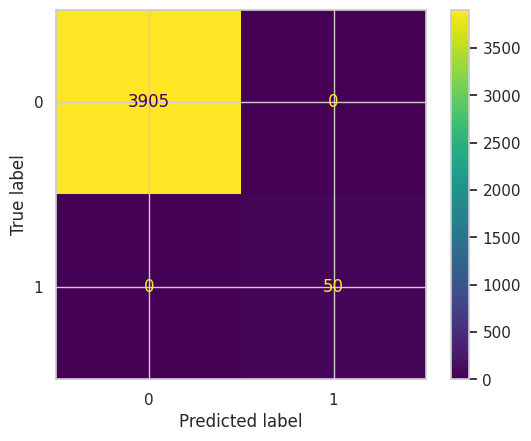

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
import plotly.express as px
from sklearn.cluster import KMeans
import tabulate

# Asegurar que 'Created at' sea datetime
order_total['Created at'] = pd.to_datetime(order_total['Created at'], errors='coerce')

# Filtrar ventas recientes de noviembre y diciembre de 2024
recent_sales = order_total[
    (order_total['Created at'].dt.month.isin([10, 11, 12])) &
    (order_total['Created at'].dt.year == 2024)
].copy()

print(f"Total de ventas recientes: {len(recent_sales)}")

# Calcular ventas recientes y totales por producto
recent_product_sales = recent_sales.groupby('Lineitem name').size().reset_index(name='Recent Order Count')
historical_sales = order_total.groupby('Lineitem name').size().reset_index(name='Historical Order Count')

# Combinar las ventas recientes y totales
combined_sales = pd.merge(recent_product_sales, historical_sales, on='Lineitem name', how='outer').fillna(0)

# Calcular ventas ponderadas
combined_sales['Weighted_Order_Count'] = (
    0.8 * combined_sales['Recent Order Count'] + 
    0.2 * combined_sales['Historical Order Count']
)

# Crear la columna 'Target' como un indicador binario
combined_sales['Target'] = (combined_sales['Recent Order Count'] > 0).astype(int)

# Dividir los datos en entrenamiento y prueba según la presencia de ventas recientes
train_data = combined_sales[combined_sales['Recent Order Count'] == 0]
test_data = combined_sales[combined_sales['Recent Order Count'] > 0]
common_rows = pd.merge(train_data, test_data, on=['Lineitem name'], how='inner')
print(f'Número de filas comunes entre entrenamiento y prueba: {len(common_rows)}')

# Escalar las características
scaler = StandardScaler()
X = scaler.fit_transform(combined_sales[['Recent Order Count', 'Historical Order Count']])
y = combined_sales['Target']

# Verificar la distribución de las clases en 'Target'
print("Distribución de Target:", np.bincount(y))

# Verificar si hay más de una clase
if len(np.unique(y)) <= 1:
    print("Error: El conjunto de datos tiene solo una clase.")
    print(f"Clases encontradas: {np.unique(y)}")
else:
    # Dividir los datos en entrenamiento y prueba
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    # Dividir los datos de entrenamiento en entrenamiento y validación
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42
    )

    print("Distribución en y_train:", np.bincount(y_train))
    print("Distribución en y_val:", np.bincount(y_val))
    print("Distribución en y_test:", np.bincount(y_test))

    # Aplicar undersampling para balancear las clases
    undersampler = RandomUnderSampler(random_state=42)
    X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

    print("Distribución después del undersampling:", np.bincount(y_train_resampled))

    # Definir el modelo y la búsqueda de hiperparámetros
    param_grid = {'C': [0.001, 0.01, 0.1], 'max_iter': [500]}
    strat_kfold = StratifiedKFold(n_splits=5)

    log_reg = LogisticRegression(class_weight='balanced')
    grid_search = GridSearchCV(log_reg, param_grid, cv=strat_kfold, scoring='roc_auc', error_score='raise')
    grid_search.fit(X_train_resampled, y_train_resampled)

    best_model = grid_search.best_estimator_
    print(f"Mejores parámetros: {grid_search.best_params_}")

    # Evaluación en validación
    y_val_pred = best_model.predict(X_val)
    y_val_prob = best_model.predict_proba(X_val)[:, 1]
    print("Reporte de validación:\n", classification_report(y_val, y_val_pred))
    print(f"AUC-ROC en validación: {roc_auc_score(y_val, y_val_prob):.4f}")

    # Evaluación en prueba
    y_test_pred = best_model.predict(X_test)
    y_test_prob = best_model.predict_proba(X_test)[:, 1]
    print("Reporte de prueba:\n", classification_report(y_test, y_test_pred))
    print(f"AUC-ROC en prueba: {roc_auc_score(y_test, y_test_prob):.4f}")

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

    # Calcular las probabilidades de predicción
    combined_sales['Prediction_Probability'] = best_model.predict_proba(X)[:, 1]

    # Mostrar los 15 productos más probables para noviembre y diciembre 2024
    threshold = 0.6
    top_predictions = combined_sales[combined_sales['Prediction_Probability'] > threshold]
    top_predictions = top_predictions.sort_values(by='Prediction_Probability', ascending=False).head(15)

    print("Top 15 productos más probables para noviembre y diciembre 2024:")
    formatted_table = tabulate.tabulate(
        top_predictions[['Lineitem name', 'Prediction_Probability']],
        headers=['Producto', 'Probabilidad de Venta'],
        tablefmt='fancy_grid'
    )
    print(formatted_table)

    # Agrupar ventas recientes por cliente
    customer_data = recent_sales.groupby('Email').agg(
        Total_Spent=('Total', 'sum'),
        Order_Count=('Id', 'count')
    ).reset_index()

    # Aplicar logaritmo a Total_Spent
    customer_data['Log_Total_Spent'] = np.log1p(customer_data['Total_Spent'])
    customer_data_scaled = scaler.fit_transform(customer_data[['Log_Total_Spent', 'Order_Count']])

    # Aplicar KMeans para clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

    # Visualizar clustering con Plotly
    fig = px.scatter(
        customer_data, 
        x='Log_Total_Spent', 
        y='Order_Count', 
        color='Cluster', 
        title='Clustering de Clientes (Log del Total Gastado)',
        labels={'Log_Total_Spent': 'Log(1 + Total Gastado)', 'Order_Count': 'Número de Órdenes'},
        hover_data=['Email'],
        size='Order_Count',
        size_max=12,
        template='plotly_dark'
    )

    fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))
    fig.update_yaxes(range=[0, customer_data['Order_Count'].max() + 2])
    fig.show()


## HEATMAP DE VENTAS

In [14]:
order_total['Created at'] = pd.to_datetime(order_total['Created at'], errors='coerce')

order_total = order_total[
    (order_total['Created at'].dt.year == 2023) &
    (order_total['Created at'].dt.month == 12)
]
order_total['Day'] = order_total['Created at'].dt.day_name()
order_total['Hour'] = order_total['Created at'].dt.strftime('%I %p')  

sales_by_day_hour = order_total.groupby(['Day', 'Hour'])['Total'].sum().reset_index()

pivot_table = sales_by_day_hour.pivot(index='Day', columns='Hour', values='Total').fillna(0)

pivot_table = pivot_table.round(0).astype(int)  

fig = px.imshow(
    pivot_table,
    text_auto=True, 
    aspect="auto",  
    color_continuous_scale='Blues',
    title='Sales Heatmap by Day and Hour (December 2023)',
    labels=dict(color="Total Sales ($)")
)

fig.update_layout(
    xaxis_title="Hour",
    yaxis_title="Day",
    font=dict(size=12)
)

fig.show()


In [15]:
order_total['Created at'] = pd.to_datetime(order_total['Created at'], errors='coerce')

order_total = order_total[
    (order_total['Created at'].dt.year == 2023) &
    (order_total['Created at'].dt.month == 12)
]

order_total['Day'] = order_total['Created at'].dt.day_name()
order_total['Hour'] = order_total['Created at'].dt.strftime('%I %p')  # 12-hour format (AM/PM)

orders_by_day_hour = order_total.groupby(['Day', 'Hour']).size().reset_index(name='Order Count')

pivot_table = orders_by_day_hour.pivot(index='Day', columns='Hour', values='Order Count').fillna(0)

pivot_table = pivot_table.astype(int)

fig = px.imshow(
    pivot_table,
    text_auto=True,  
    aspect="auto", 
    color_continuous_scale='Blues',
    title='Heatmap of Number of Orders by Day and Hour (December 2023)',
    labels=dict(color="Number of Orders")
)

fig.update_layout(
    xaxis_title="Hour",
    yaxis_title="Day",
    font=dict(size=12)
)

fig.show()


In [16]:
import pandas as pd
import plotly.express as px

order_total['Created at'] = pd.to_datetime(order_total['Created at'], errors='coerce')

order_total = order_total[
    (order_total['Created at'].dt.year == 2023) &
    (order_total['Created at'].dt.month == 12)
]

top_products = order_total.groupby('Lineitem name').size().reset_index(name='Order Count')

top_15_products = top_products.sort_values(by='Order Count', ascending=False).head(15)

fig = px.bar(
    top_15_products,
    x='Lineitem name',
    y='Order Count',
    title='Top 15 Best-Selling Products (December 2023)',
    labels={'Order Count': 'Number of Orders', 'Lineitem name': 'Product'},
    text='Order Count'  
)

fig.update_layout(
    xaxis_title="Product",
    yaxis_title="Number of Orders",
    xaxis_tickangle=-25, 
    height=600,  
    width=1200,  
    font=dict(size=12),
    plot_bgcolor='rgba(0,0,0,0)',  
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),  
    bargap=0.1 
)

fig.update_traces(
    textfont_size=14,
    textposition='outside',  
    marker=dict(color='royalblue', line=dict(color='black', width=1))  
)

fig.update_yaxes(range=[0, top_15_products['Order Count'].max() + 10])

fig.show()
